In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\train"
TEST_DIR = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\validation"

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
1      C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
2      C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
3      C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
4      C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
...                                                  ...       ...
28816  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
28817  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
28818  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
28819  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
28820  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
1     C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
2     C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
3     C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
4     C:\Users\shyam\OneDrive\Desktop\Facial Emotion...     angry
...                                                 ...       ...
7061  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
7062  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
7063  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
7064  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise
7065  C:\Users\shyam\OneDrive\Desktop\Facial Emotion...  surprise

[7066 rows x 2 columns]
0       C:\Users\shyam\OneDrive\Desktop\Facial Emotion...
1       C:\Users\shyam\OneDrive\Desktop\Facial Emotion...
2       C:\Users\shyam\OneDrive\Desktop\Facial Emotion...
3       C

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

C:\Users\shyam\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 733s 3s/step - loss: 1.8226 - accuracy: 0.2454 - val_loss: 1.8161 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 672s 3s/step - loss: 1.7852 - accuracy: 0.2584 - val_loss: 1.7299 - val_accuracy: 0.2942
Epoch 3/100
226/226 [==============================] - 636s 3s/step - loss: 1.6602 - accuracy: 0.3332 - val_loss: 1.5313 - val_accuracy: 0.4155
Epoch 4/100
226/226 [==============================] - 610s 3s/step - loss: 1.5349 - accuracy: 0.3991 - val_loss: 1.4106 - val_accuracy: 0.4482
Epoch 5/100
226/226 [==============================] - 717s 3s/step - loss: 1.4540 - accuracy: 0.4349 - val_loss: 1.3544 - val_accuracy: 0.4788
Epoch 6/100
226/226 [==============================] - 785s 3s/step - loss: 1.4183 - accuracy: 0.4537 - val_loss: 1.2927 - val_accuracy: 0.5091
Epoch 7/100
226/226 [==============================] - 934s 4s/step - loss: 1.3678 - accuracy: 0.4745 - val_loss: 1.2554 - val_accuracy:

KeyboardInterrupt: 

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [22]:
from keras.models import model_from_json

In [28]:

json_file = open(r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()

model = model_from_json(model_json)
model.load_weights(r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\facialemotionmodel.h5")


In [29]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [30]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [31]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\sad\54.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\shyam\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 311ms/step
model prediction is  sad


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 47ms/step
model prediction is  sad


C:\Users\shyam\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


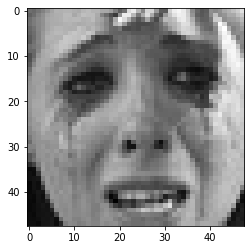

In [33]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\sad\54.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 28ms/step
model prediction is  surprise


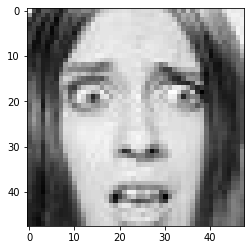

In [34]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\fear\96.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 38ms/step
model prediction is  disgust


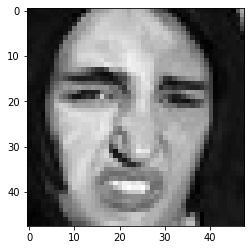

In [35]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\disgust\2419.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 33ms/step
model prediction is  happy


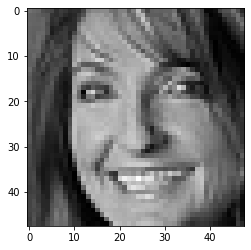

In [36]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\happy\105.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 48ms/step
model prediction is  surprise


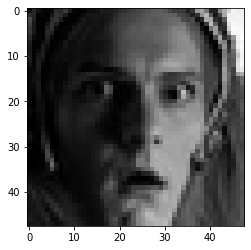

In [37]:
image = r"C:\Users\shyam\OneDrive\Desktop\Facial Emotion Recognition\images\images\train\surprise\322.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')